In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# importing or loading the dataset
# importing or loading the dataset
dataset = pd.read_csv('C:/Users/Hi/Dataset1/Wine.csv')


# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values


In [3]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [4]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [5]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [6]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [7]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)


In [8]:
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


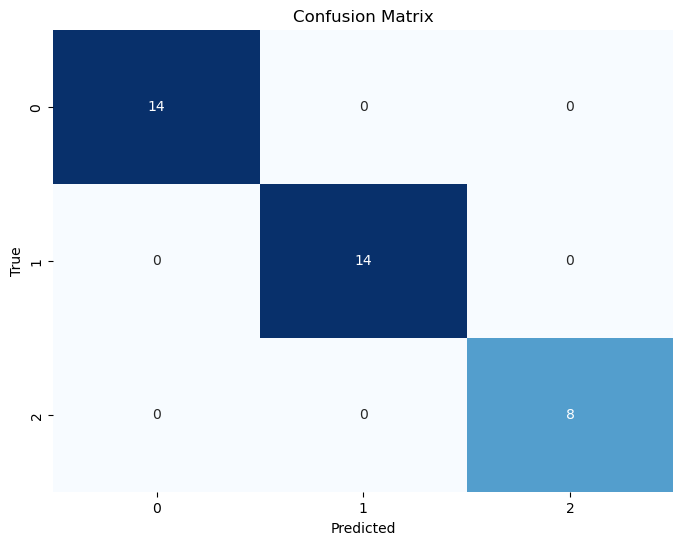

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


C:\Users\Hi\AppData\Local\Temp\ipykernel_15996\1580301385.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green', 'blue'))(i), label = j)


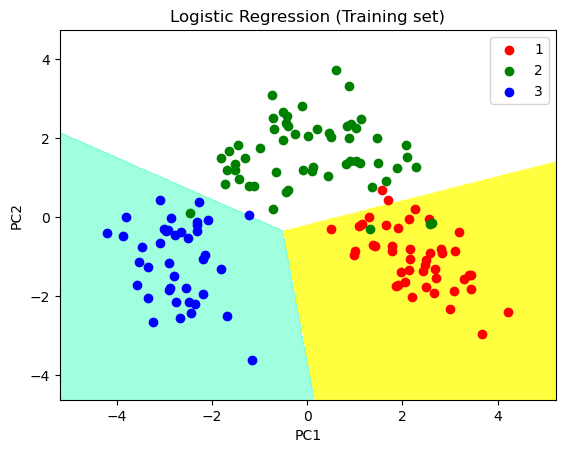

In [10]:
# Predicting the training set
# result through scatter plot 
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()


C:\Users\Hi\AppData\Local\Temp\ipykernel_15996\2668477936.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green', 'blue'))(i), label = j)


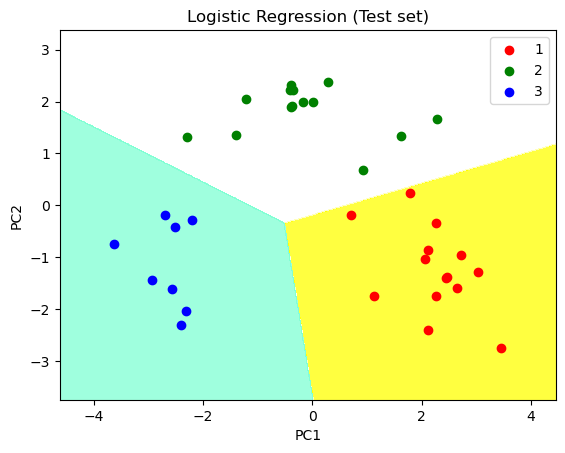

In [11]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()


In [12]:
# plot the first two principal components with labels
y = dataset.iloc[:, -1].values
colors = ["r", "g"]
labels = ["Class 1", "Class 2"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_test[y == i, 0], X_test[y == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 36 but corresponding boolean dimension is 178

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_set is your feature set and y is your labels
# Ensure you have imported necessary libraries and loaded your dataset

# Feature scaling (if not done already)
scaler = StandardScaler()
X_set_scaled = scaler.fit_transform(X_set)

# Applying PCA
pca = PCA(n_components=2)
X_set_pca = pca.fit_transform(X_set_scaled)

# Plotting the first two principal components with labels
y = dataset.iloc[:, -1].values
colors = ["r", "g"]
labels = ["Class 1", "Class 2"]

for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_set_pca[y == i, 0], X_set_pca[y == i, 1], color=color, label=label)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 36 but corresponding boolean dimension is 178

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_set is your feature set and y is your labels
# Ensure you have imported necessary libraries and loaded your dataset

# Feature scaling (if not done already)
scaler = StandardScaler()
X_set_scaled = scaler.fit_transform(X_set)

# Applying PCA
pca = PCA(n_components=2)
X_set_pca = pca.fit_transform(X_set_scaled)

# Plotting the first two principal components with labels
y = dataset.iloc[:, -1].values
colors = ["r", "g"]
labels = np.unique(y)

for label, color in zip(labels, colors):
    plt.scatter(X_set_pca[y == label, 0], X_set_pca[y == label, 1], color=color, label=f"Class {label}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 36 but corresponding boolean dimension is 178